# WeatherPy

OBSERVABLE TRENDS 
1) A general trend that was observed was that temperature increases as we approach the equator and decreases as we move away from it. 

2) Latitude has no impact on cloudiness or windspeed.

3) It becomes less humid the closer to the equator you are.


In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import api_keys

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
# OpenWeatherMap API Key
api_key = api_keys.weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through cities 
for city in cities:  

    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=ponta do sol
Processing Record 2 | Paithan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=paithan
Processing Record 3 | Katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=katsuura
Processing Record 4 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=qaanaaq
Processing Record 5 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=esperance
Processing Record 6 | Acapulco de Juarez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=acapulco
Processing Record 7 | Faanui
http://api.openweathermap.org/data/2.5/w

Processing Record 56 | Thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=thompson
Processing Record 57 | Huai Yot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=huai yot
Processing Record 58 | Tieli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=tieli
Processing Record 59 | Hong Kong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=victoria
Processing Record 60 | Fort Walton Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=fort walton beach
Processing Record 61 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=atuona
Processing Record 62 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d2

Processing Record 112 | Carutapera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=carutapera
Processing Record 113 | Parkes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=parkes
Processing Record 114 | Glendive
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=glendive
Processing Record 115 | Fort Collins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=fort collins
Processing Record 116 | Mossamedes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=namibe
Processing Record 117 | Toamasina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=toamasina
Processing Record 118 | Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fe

Processing Record 168 | Chui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=chuy
Processing Record 169 | Lock Haven
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=lock haven
Processing Record 170 | Souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=souillac
Processing Record 171 | Tonj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=tonj
Processing Record 172 | Wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=wanning
Processing Record 173 | Shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=shingu
Processing Record 174 | Fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=fairbanks
P

City not found. Skipping...
Processing Record 224 | Kaeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=kaeo
Processing Record 225 | Pemba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=pemba
Processing Record 226 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=lavrentiya
City not found. Skipping...
Processing Record 227 | Nangwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=nangwa
Processing Record 228 | North Myrtle Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=north myrtle beach
Processing Record 229 | Cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=cabedelo
City not found. Skipping...
City not found. Skipping...
Processing R

Processing Record 279 | Wagar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=wagar
Processing Record 280 | Haldia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=haldia
Processing Record 281 | Pekalongan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=pekalongan
Processing Record 282 | Kampene
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=kampene
Processing Record 283 | Agar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=agar
Processing Record 284 | Salinopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=salinopolis
Processing Record 285 | Villazon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=vill

Processing Record 336 | Poronaysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=poronaysk
Processing Record 337 | Cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=cayenne
Processing Record 338 | Laas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=lasa
Processing Record 339 | La Ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=la ronge
Processing Record 340 | Khovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=hovd
Processing Record 341 | Cristalina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=cristalina
Processing Record 342 | Eydhafushi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=eyd

Processing Record 392 | Quelimane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=quelimane
Processing Record 393 | Machakos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=machakos
Processing Record 394 | Port-Gentil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=port-gentil
Processing Record 395 | Necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=necochea
Processing Record 396 | Atoka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=atoka
Processing Record 397 | Cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=cidreira
Processing Record 398 | Hoa Binh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986

Processing Record 449 | Plouzane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=plouzane
Processing Record 450 | Broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=broome
Processing Record 451 | Denizli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=denizli
Processing Record 452 | Rehoboth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=rehoboth
Processing Record 453 | Wajid
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=wajid
Processing Record 454 | Durusu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=durusu
Processing Record 455 | Conakry
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=conakry
Pro

Processing Record 504 | Svetlaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=svetlaya
Processing Record 505 | Calvinia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=calvinia
Processing Record 506 | Tromso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=tromso
Processing Record 507 | Zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=zyryanka
Processing Record 508 | Kathmandu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=kathmandu
Processing Record 509 | Brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=brae
Processing Record 510 | Athens
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=athens

Processing Record 561 | Ust'-Koksa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=ust-koksa
Processing Record 562 | Trofors
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=trofors
Processing Record 563 | Aasiaat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=aasiaat
Processing Record 564 | Orapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=orapa
Processing Record 565 | Richards Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=richards bay
Processing Record 566 | Buchanan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986fc1d1&q=buchanan
Processing Record 567 | Huicheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b24ebec71fecf3c5d28dc1986f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
# DF 
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed}

weather_data = pd.DataFrame(weatherpy_dict)

# Count of weather data
weather_data.count()

City          585
Cloudiness    585
Country       585
Date          585
Humidity      585
Lat           585
Lng           585
Max Temp      585
Wind Speed    585
dtype: int64

In [30]:
# Saving DF to csv 
weather_data.to_csv('weather_output/weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ponta do Sol,20,PT,1580537643,51,32.67,-17.10,66.00,2.24
1,Paithan,20,IN,1580537938,49,19.48,75.38,73.40,5.82
2,Katsuura,20,JP,1580537635,34,35.13,140.30,55.99,6.93
3,Qaanaaq,100,GL,1580537608,99,77.48,-69.36,-23.48,0.89
4,Esperance,75,AU,1580537199,38,-33.87,121.90,73.40,14.99


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

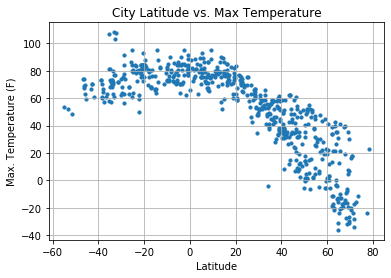

In [24]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

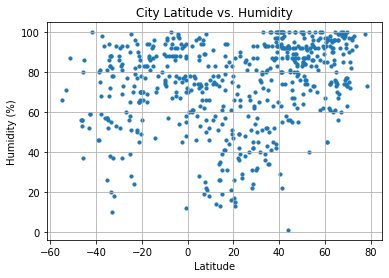

In [25]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

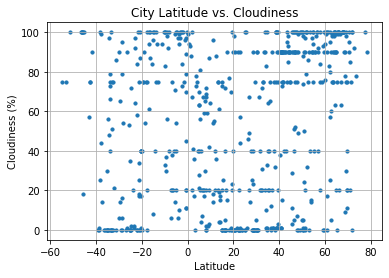

In [26]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

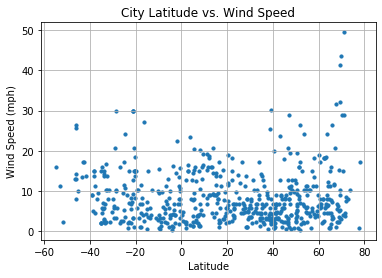

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots


In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = weather_data.loc[weather_data['Lat'] > 0]
southern_hemisphere_df = weather_data.loc[weather_data['Lat'] < 0]

northern_hemisphere_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ponta do Sol,20,PT,1580537643,51,32.67,-17.10,66.00,2.24
1,Paithan,20,IN,1580537938,49,19.48,75.38,73.40,5.82
2,Katsuura,20,JP,1580537635,34,35.13,140.30,55.99,6.93
3,Qaanaaq,100,GL,1580537608,99,77.48,-69.36,-23.48,0.89
5,Acapulco de Juarez,20,MX,1580537921,83,16.86,-99.89,75.20,2.24


In [12]:
southern_hemisphere_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
4,Esperance,75,AU,1580537199,38,-33.87,121.90,73.40,14.99
6,Faanui,100,PF,1580537599,81,-16.48,-151.75,80.19,27.09
7,Coquimbo,90,CL,1580537662,88,-29.95,-71.34,62.60,8.05
8,Saint-Philippe,34,RE,1580537609,65,-21.36,55.77,84.20,29.97
10,Cape Town,79,ZA,1580537608,88,-33.93,18.42,71.01,13.87


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

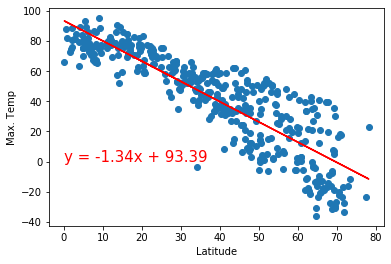

In [27]:
#Create a Scatter Plot for Lattitude vs Temperature of City
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.show

plt.savefig("Plots/N max temp vs latitude.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

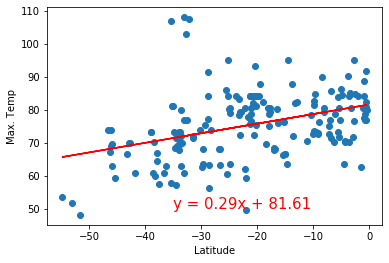

<Figure size 432x288 with 0 Axes>

In [28]:
#Create a Scatter Plot for Lattitude vs Temperature of City (Southern Hemisphere)
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"red")
plt.annotate(line_eq,(-35,50),fontsize=15,color="red")
plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.show()

plt.savefig("Plots/S max temp vs latitude.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

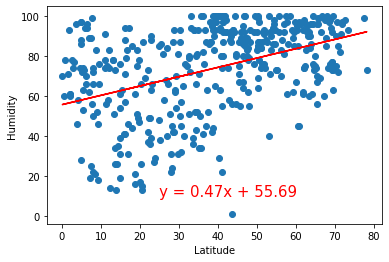

<Figure size 432x288 with 0 Axes>

In [29]:

x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,10),fontsize=15,color="red")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

plt.savefig("Plots/N humidity vs latitude.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

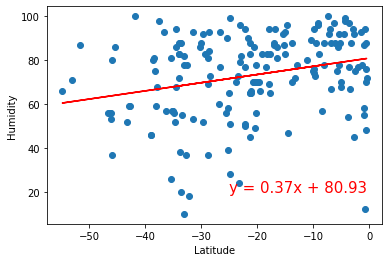

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.show()

plt.savefig("Plots/S humidity vs latitiude.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

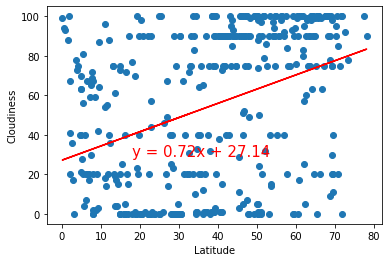

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,29),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

plt.savefig("Plots/N Cloudiness vs latitude.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

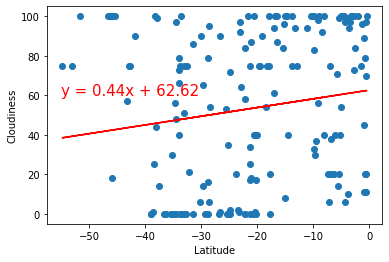

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

plt.savefig("Plots/S cloudiness vs latitude.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

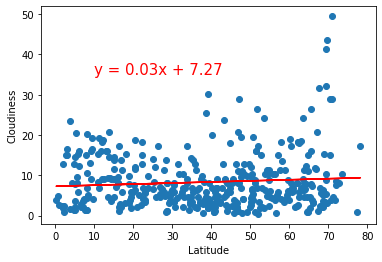

<Figure size 432x288 with 0 Axes>

In [19]:

x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,35),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()

plt.savefig("Plots/N wind vs latitude.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

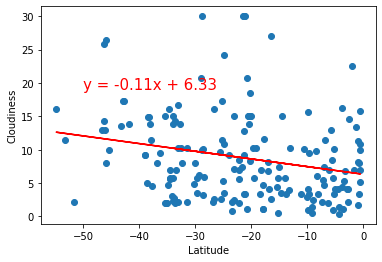

<Figure size 432x288 with 0 Axes>

In [23]:
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,19),fontsize=15,color="red")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.show()
plt.savefig("Plots/S wind vs latitude")